# LCP 35. 电动车游城市

小明的电动车电量充满时可行驶距离为 cnt，每行驶 1 单位距离消耗 1 单位电量，且花费 1 单位时间。小明想选择电动车作为代步工具。地图上共有 N 个景点，景点编号为 0 ~ N-1。他将地图信息以 [城市 A 编号,城市 B 编号,两城市间距离] 格式整理在在二维数组 paths，表示城市 A、B 间存在双向通路。初始状态，电动车电量为 0。每个城市都设有充电桩，charge[i] 表示第 i 个城市每充 1 单位电量需要花费的单位时间。请返回小明最少需要花费多少单位时间从起点城市 start 抵达终点城市 end。

示例 1：

输入：paths = [[1,3,3],[3,2,1],[2,1,3],[0,1,4],[3,0,5]], cnt = 6, start = 1, end = 0, charge = [2,10,4,1]

输出：43

解释：最佳路线为：1->3->0。 在城市 1 仅充 3 单位电至城市 3，然后在城市 3 充 5 单位电，行驶至城市 5。 充电用时共 3*10 + 5*1= 35 行驶用时 3 + 5 = 8，此时总用时最短 43。

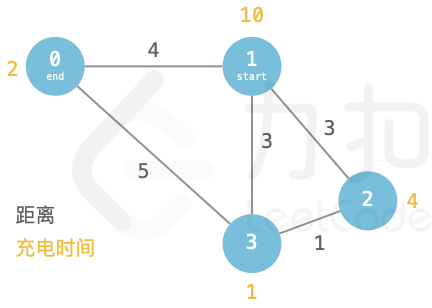

示例 2：

输入：paths = [[0,4,2],[4,3,5],[3,0,5],[0,1,5],[3,2,4],[1,2,8]], cnt = 8, start = 0, end = 2, charge = [4,1,1,3,2]

输出：38

解释：最佳路线为：0->4->3->2。 城市 0 充电 2 单位，行驶至城市 4 充电 8 单位，行驶至城市 3 充电 1 单位，最终行驶至城市 2。 充电用时 4*2+2*8+3*1 = 27 行驶用时 2+5+4 = 11，总用时最短 38。


# 给定数据

In [1]:
paths = [[0,4,2],[4,3,5],[3,0,5],[0,1,5],[3,2,4],[1,2,8]]
cnt = 8
start = 0
end = 2
charge = [4,1,1,3,2]

# 构建图，输出所有路径

In [2]:
def find_paths_with_time(paths, start, end):
    # 构建图
    graph = {}
    for path in paths:
        a, b, time = path[0], path[1], path[2]  # 假设路径信息是一个列表，包含起点、终点和时间
        if a not in graph:
            graph[a] = []
        if b not in graph:
            graph[b] = []
        graph[a].append((b, time))
        graph[b].append((a, time))

    # 深度优先搜索
    def dfs(current, end, path, all_paths):
        path.append(current)
        if current == end:
            all_paths.append(path.copy())
        else:
            for neighbor, time in graph[current]:
                if neighbor not in path:  # 避免闭合
                    dfs(neighbor, end, path, all_paths)
        path.pop()  # 回溯

    all_paths = []
    dfs(start, end, [], all_paths)
    return all_paths, graph  # 返回所有路径和图

def calculate_total_time(paths, start, end):
    all_paths, graph = find_paths_with_time(paths, start, end)  # 获取所有路径和图
    total_time = 0
    for path in all_paths:
        path_time = 0
        for i in range(len(path) - 1):
            for neighbor, time in graph[path[i]]:
                if neighbor == path[i + 1]:
                    path_time += time
        total_time += path_time
    return total_time

## 输出所有路径

In [3]:
all_paths, graph = find_paths_with_time(paths, start, end)
for path in all_paths:
    print("path" ,path)

path [0, 4, 3, 2]
path [0, 3, 2]
path [0, 1, 2]


# 计算在路上的交通时间

In [4]:
def calculate_road_time(paths, start, end):
    all_paths, graph = find_paths_with_time(paths, start, end)  # 获取所有路径和图
    path_times = []  # 存储每条路径的时间
    for path in all_paths:
        each_path_times = []
        path_time = 0
        for i in range(0,len(path) - 1):
            for neighbor, time in graph[path[i]]:
                if neighbor == path[i + 1]:
                    path_time += time
                    each_path_times.append((time))
        path_times.append((path, each_path_times, path_time))  # 将路径和时间信息添加到列表中
    return path_times  # 返回每条路径的时间信息

## 输出交通时间

In [5]:
path_times = calculate_road_time(paths, start, end)
for path, each_path_times, time in path_times:
    print("path" ,path, path[1], "each path time:", each_path_times, "road time：", time)

path [0, 4, 3, 2] 4 each path time: [2, 5, 4] road time： 11
path [0, 3, 2] 3 each path time: [5, 4] road time： 9
path [0, 1, 2] 1 each path time: [5, 8] road time： 13


# 计算每条路径最短的充电时间和总时间

In [6]:
def find_min_charge_point(path, a, b):
    point = a
    time = charge[path[a]]
    for i in range(a,b+1):
        if charge[path[i]] < charge [path[point]]:
            point = i
            time = charge [path[point]]
    return point,time

In [7]:
def calculate_time(paths, start, end):
    all_paths, graph = find_paths_with_time(paths, start, end)  # 获取所有路径和图
    path_times = calculate_road_time(paths, start, end)
    all_times = []
    for path, each_path_times, road_time in path_times:
        charge_time = 0
        min_point_charge = 0
        min_charge_time = charge[path[0]]
        min_point = 0
        charge_process = ""
        for i in range(len(each_path_times)):
            min_point_former = min_point
            min_point, min_charge_time = find_min_charge_point(path, min_point, i)
            if (min_point_former != min_point):
                charge_process = charge_process + f"{charge[path[min_point_former]]}*{min_point_charge}+"
                min_point_charge = 0
            if ((min_point_charge + each_path_times[i]) <= cnt):
                charge_time = charge_time + min_charge_time*(each_path_times[i])
                min_point_charge = min_point_charge + each_path_times[i]
            else:
                charge_time = charge_time + min_charge_time*(cnt - min_point_charge)
                min_point_charge = min_point_charge + each_path_times[i] - cnt
                charge_process = charge_process + f"{charge[path[min_point]]}*{cnt}+"
                min_point, min_charge_time = find_min_charge_point(path, min_point+1,i)
                charge_time = charge_time + min_charge_time*min_point_charge
        charge_process = charge_process +f"{charge[path[min_point]]}*{min_point_charge} " 
        all_time = road_time + charge_time
        all_times.append((path, each_path_times, road_time, charge_process, charge_time, all_time))  # 将路径和时间信息添加到列表中
    return all_times  # 返回每条路径的时间信息

## 输出充电时间和总时间

In [8]:
all_times = calculate_time(paths, start, end)
for path, each_path_times, road_time, charge_time, charge_process, all_time in all_times:
    print("path" ,path, "each_path_times",each_path_times, " road time：", road_time, "charge time:" , charge_process,"=", charge_time," all time", all_time)

path [0, 4, 3, 2] each_path_times [2, 5, 4]  road time： 11 charge time: 27 = 4*2+2*8+3*1   all time 38
path [0, 3, 2] each_path_times [5, 4]  road time： 9 charge time: 32 = 4*5+3*4   all time 41
path [0, 1, 2] each_path_times [5, 8]  road time： 13 charge time: 28 = 4*5+1*8   all time 41


# 选择最短时间路径

In [9]:
fastest_choice = 0
for i in range(1,len(all_times)):
    if all_times[i][3]< all_times[fastest_choice][3]:
        fastest_choice = i
print("path" ,all_times[fastest_choice][0], " road time：", all_times[fastest_choice][2], " charge time:", all_times[fastest_choice][3], " all time", all_times[fastest_choice][5])

path [0, 4, 3, 2]  road time： 11  charge time: 4*2+2*8+3*1   all time 38
